-----
<div class="alert alert-block alert-info">
<h1> Youtube Views Scraper </h1>

<div class="alert alert-block alert-warning">  
    
<h3><b>In this notebook, we manually scraped the week by week viewership data of Joe Rogan on Youtube through the website SocialBlade. <br></br>
    
We then inputted the data into a dataframe to perform some EDA before saving it as a csv file. </b></h3>
</div>

We start by manually scraping the viewership data from Joe Rogan dating back to March 2019. The first column refers to total weekly views, the second column refers to weekly views gained.

In [4]:
views_list = [[1551848400000,10618117],[1552276800000,13274734],[1552881600000,13138552],[1553486400000,11121153],[1554091200000,14044440],[1554696000000,11573818],[1555300800000,12099240],[1555905600000,12525818],[1556510400000,12532836],[1557115200000,10985491],[1557720000000,11620444],[1558324800000,12371253],[1558929600000,12890561],[1559534400000,13797932],[1560139200000,9113746],[1560744000000,1301400],[1561348800000,13410501],[1561953600000,11825644],[1562558400000,12116664],[1563163200000,10062497],[1563768000000,10297424],[1564372800000,12516995],[1564977600000,19965241],[1565582400000,13379516],[1566187200000,13280547],[1566792000000,12694200],[1567396800000,13433990],[1568001600000,15751473],[1568606400000,14283624],[1569211200000,8973661],[1569816000000,13758566],[1570420800000,12946140],[1571025600000,8154362],[1571630400000,19414371],[1572235200000,15195716],[1572843600000,13395050],[1573448400000,15471723],[1574053200000,13109811],[1574658000000,11911186],[1575262800000,14678353],[1575867600000,14808322],[1576472400000,13955414],[1577077200000,10926961],[1577682000000,11811727],[1578286800000,17983519],[1578891600000,25007343],[1579496400000,18744720],[1580101200000,16546810],[1580706000000,18426903],[1581310800000,17517804],[1581915600000,17546918],[1582520400000,16405677],[1583125200000,15849535],[1583726400000,26733234],[1584331200000,18216817],[1584936000000,20979773],[1585540800000,20481457],[1586145600000,19470672],[1586750400000,21394721],[1587355200000,19056912],[1587960000000,21054454],[1588564800000,25962290],[1589169600000,22536132],[1589774400000,21324833],[1590379200000,22212708],[1590984000000,20059429],[1591588800000,24978770],[1592193600000,21309215],[1592798400000,18878580],[1593403200000,15478895],[1594008000000,20399498],[1594612800000,19121198],[1595217600000,22088377],[1595822400000,27057010],[1596427200000,22825821],[1597032000000,23170257],[1597636800000,21895536],[1598241600000,15202955],[1598846400000,24155270],[1599451200000,21679370],[1600056000000,19842874],[1600660800000,15566266],[1601265600000,15921881],[1601870400000,14523387],[1602475200000,15678789],[1603080000000,19426198],[1603684800000,28516033],[1604293200000,26776041],[1604898000000,17792529],[1605502800000,19934712],[1606107600000,15384119],[1606712400000,-1922977851],[1607317200000,10306794],[1607922000000,11123316],[1608526800000,9179147],[1609131600000,10818453],[1609736400000,11607029],[1610341200000,12664717],[1610946000000,19104055],[1611550800000,20157423],[1612155600000,12495281],[1612760400000,21223797],[1613365200000,10782156],[1613970000000,17939800],[1614574800000,11291072],[1615179600000,14068579],[1615780800000,11186760],[1616385600000,12781092],[1616990400000,11003188],[1617595200000,12757312],[1618200000000,10352693],[1618804800000,9413514],[1619409600000,11680326],[1620014400000,12242089],[1620619200000,10640702],[1621224000000,7804321],[1621828800000,7697249],[1622433600000,9656136],[1623038400000,12340383],[1623643200000,12254233],[1624248000000,8096839],[1624852800000,13306936],[1625457600000,12014119],[1626062400000,14770807],[1626667200000,9741438],[1627272000000,12968434],[1627876800000,11203646],[1628481600000,14124456],[1629086400000,16519776],[1629691200000,9765210],[1630296000000,6867369],[1630900800000,15147942],[1631505600000,7541655],[1632110400000,7612963],[1632715200000,8910349],[1633320000000,6401358],[1633924800000,10266120],[1634529600000,15827530],[1635134400000,12029950],[1635739200000,11168388],[1636347600000,16939889],[1636952400000,12666344],[1637557200000,11992508],[1638162000000,14649747],[1638766800000,10087729],[1639371600000,11025025],[1639976400000,14045687],[1640581200000,14023547],[1641186000000,17810560],[1641790800000,19731256],[1642395600000,13732404],[1643000400000,17233953],[1643605200000,14126353],[1644210000000,17137853],[1644814800000,12540248],[1645419600000,11394258]]

We then pass this information into a pandas DataFrame to manipulate it more easily

In [8]:
import pandas as pd
views_df = pd.DataFrame(views_list, columns=["weekly_views", "weekly_gained_views"])
views_df = views_df.iloc[1: , :]
views_df.head()

,weekly_views,weekly_gained_views
1,1552276800000,13274734
2,1552881600000,13138552
3,1553486400000,11121153
4,1554091200000,14044440
5,1554696000000,11573818


We then create a time column to add the start date of each week into the DataFrame.

In [18]:
import datetime

# Create a list of every week start date starting from March 11 2019 up until February 21 2022
date = datetime.datetime(2019, 3, 11)
week_of_list =[]
week_of_list.append(date)
for i in range(len(views_df)-1):
    date += datetime.timedelta(days=7) 
    week_of_list.append(date)
    
# add week of column to DataFrame
views_df['week_of']= week_of_list
views_df.head()

,weekly_views,weekly_gained_views,week_of
1,1552276800000,13274734,2019-03-11
2,1552881600000,13138552,2019-03-18
3,1553486400000,11121153,2019-03-25
4,1554091200000,14044440,2019-04-01
5,1554696000000,11573818,2019-04-08


## EDA

We can see that on average viewership increases from one week to the next as the mean and the 25th percentile are both positive. We do some further exploring to check how many negative values there are. 

In [21]:
views_df.describe()

,weekly_views,weekly_gained_views
count,1.550000e+02,1.550000e+02
mean,1.598848e+12,2.387444e+06
std,2.714915e+10,1.557275e+08
min,1.552277e+12,-1.922978e+09
25%,1.575565e+12,1.159042e+07
50%,1.598846e+12,1.375857e+07
75%,1.622131e+12,1.810017e+07
max,1.645420e+12,2.851603e+07


We can see that there is only one week where viewership decreases, which is the week corresponding to the switch to Spotify, which we consider a factor unrelated to social media sentiment. This means that we most likely don't have any instances in which social media sentiment has caused decrease in viewership, and will therefore look moving forward for fluctuations in viewerships increases.

In [23]:
views_df[views_df['weekly_gained_views'] < 0]

,weekly_views,weekly_gained_views,week_of
91,1606712400000,-1922977851,2020-11-30


We plot a graph to see if we can find fluctutations in gained viewers following the switch to Spotify, where values will all be positive, and find that the values do indeed fluctuate significantly.

In [24]:
graph_df = views_df[views_df['week_of'] > '2020-11-30']

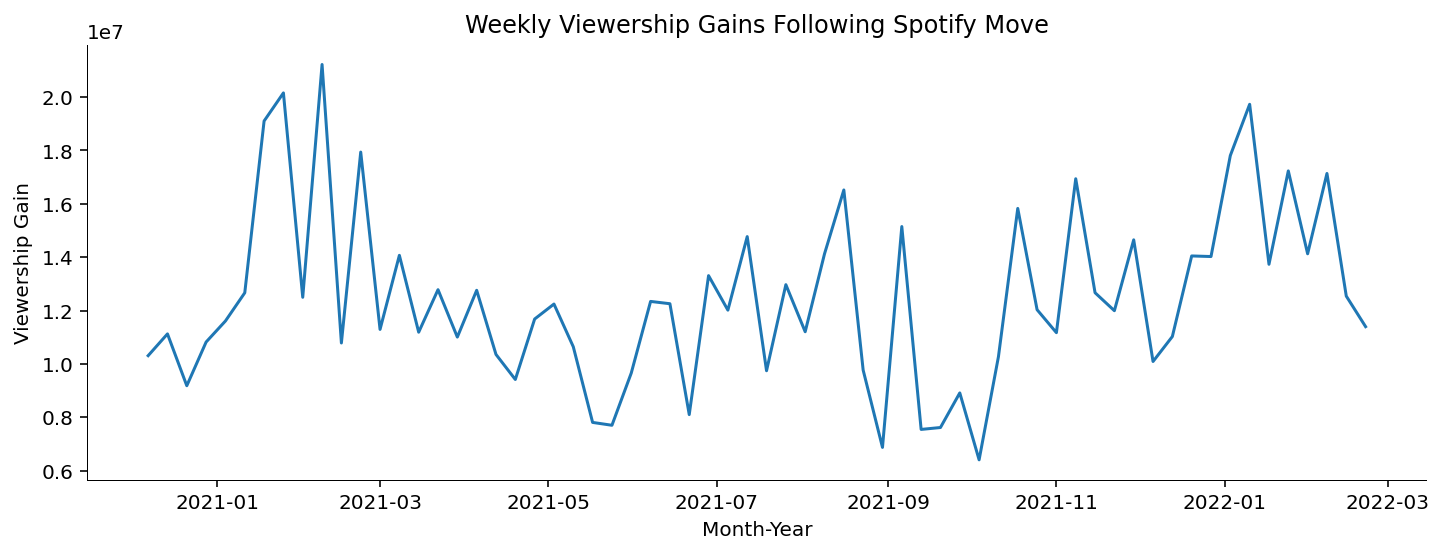

In [30]:
import matplotlib.pyplot as plt
from matplotlib import colors 

%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(12,4)) 

ax.plot(graph_df['week_of'], graph_df['weekly_gained_views'])

ax.set_xlabel("Month-Year", )
ax.set_ylabel("Viewership Gain")

ax.set_title('Weekly Viewership Gains Following Spotify Move')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

Finally we submit the data to a csv file we will upload to an S3 bucket.

In [32]:
df.to_csv('full_youtube_data.csv', index=False)